In [ ]:
import sklearn.metrics as skm
import sys
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm



ssl_final_block_train = np.load("./self_supervised_cifar100/features_train.npy")
ssl_3rd_block_train = np.load("./self_supervised_cifar100/train_3rd_block.npy") 
ssl_2nd_block_train = np.load("./self_supervised_cifar100/train_2nd_block.npy") 
# ssl_1st_block_train = np.load("./self_supervised_cifar100/train_1st_block.npy") 
ssl_labels_train = np.load("./self_supervised_cifar100/labels_train.npy")  

sl_final_block_train = np.load("./supervised_cifar100/features_train.npy")
sl_3rd_block_train = np.load("./supervised_cifar100/train_3rd_block.npy") 
sl_2nd_block_train = np.load("./supervised_cifar100/train_2nd_block.npy") 
# sl_1st_block_train = np.load("./supervised_cifar100/train_1st_block.npy") 
sl_labels_train = np.load("./supervised_cifar100/labels_train.npy") 

# tsne = TSNE(n_components=2).fit_transform(ssl_features_train2)
# ssl_embedding_1 = ssl_1st_block_train
print(ssl_2nd_block_train.shape)
ssl_embedding_2 = ssl_2nd_block_train.reshape(5000, -1)[:1000]
ssl_embedding_3 = ssl_3rd_block_train.reshape(5000, -1)[:1000]
ssl_embedding_4 = ssl_final_block_train.reshape(5000, -1)[:1000]
ssl_labels = ssl_labels_train[:1000]

# sl_embedding_1 = sl_1st_block_train
sl_embedding_2 = sl_2nd_block_train.reshape(5000, -1)[:1000]
sl_embedding_3 = sl_3rd_block_train.reshape(5000, -1)[:1000]
sl_embedding_4 = sl_final_block_train.reshape(5000, -1)[:1000]
sl_labels = sl_labels_train[:1000]

print(sl_embedding_2.shape)


In [ ]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(sl_embedding_3)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = ssl_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

In [ ]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(sp_embedding)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = sp_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

In [ ]:
# con_embedding = np.concatenate((sp_embedding, ssl_embedding), axis = 1)
con_embedding = 0.2 * sp_embedding + 0.8 * ssl_embedding
print(con_embedding.shape)
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(con_embedding)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = sp_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()


In [1]:
import sklearn.metrics as skm
import sys
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm
ssl_features_ood = np.load("./self_supervised_cifar100/features_ood.npy")
ssl_labels_ood = np.load("./self_supervised_cifar100/labels_ood.npy") 

sl_features_ood = np.load("./supervised_cifar100/features_ood.npy")
sl_labels_ood = np.load("./supervised_cifar100/labels_ood.npy") 


print(ssl_features_ood.shape)
# ssl_embedding = ssl_features_ood.reshape(5000, -1)[:1000]

ssl_labels = ssl_labels_ood

print(sl_features_ood.shape)
# sl_embedding = sl_features_ood
sl_labels = sl_labels_ood


(5000, 2048)
(5000, 2048)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.444s...
[t-SNE] Computed neighbors for 5000 samples in 94.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.436035
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.544769
[t-SNE] KL divergence after 1000 iterations: 2.804005


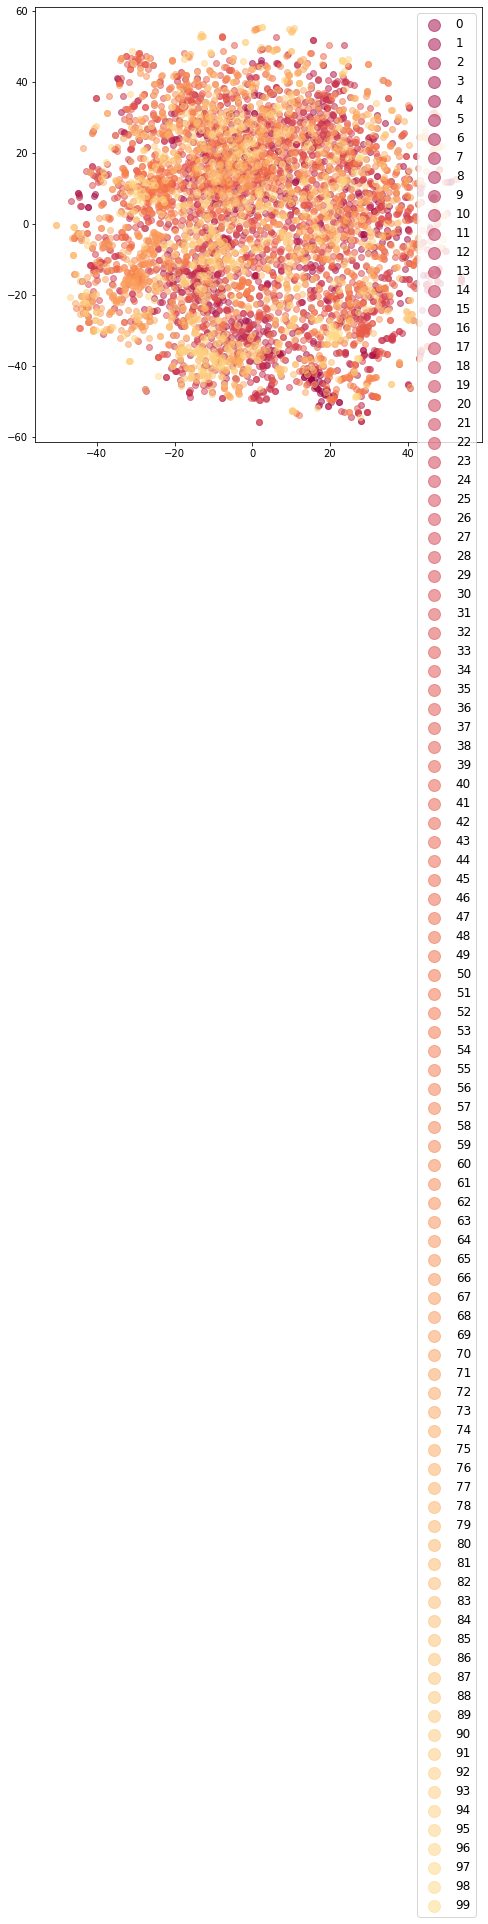

In [5]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(ssl_features_ood)
# Plot those points as a scatter plot and label them based on the pred labels
# cmap = cm.get_cmap('tab20')
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 100
for lab in range(num_categories):
    indices = ssl_labels ==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.404s...
[t-SNE] Computed neighbors for 5000 samples in 87.294s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.174693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.077240
[t-SNE] KL divergence after 1000 iterations: 1.901938


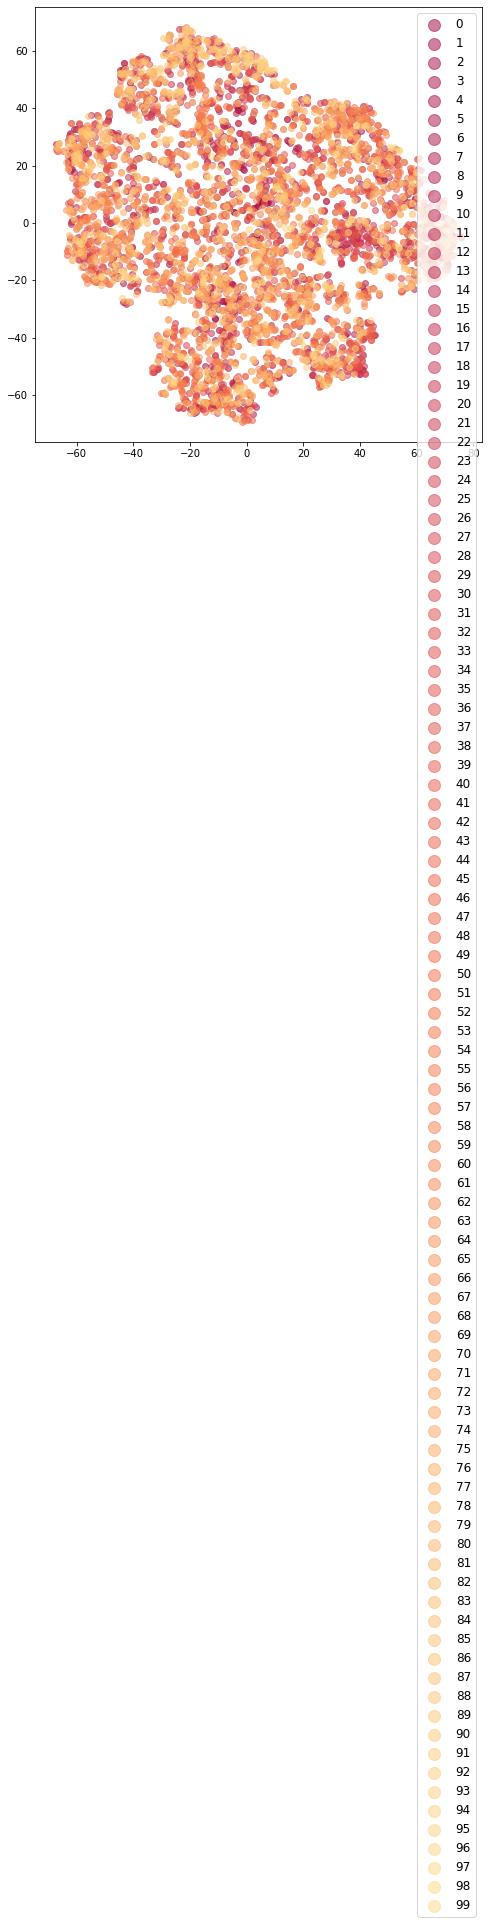

In [6]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(sl_features_ood)
# Plot those points as a scatter plot and label them based on the pred labels
# cmap = cm.get_cmap('tab20')
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 100
for lab in range(num_categories):
    indices = sl_labels ==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()